In [1]:
import sys
sys.path.append("./../../src")
import pandas as pd
import numpy as np

import torch
from torch import nn, optim

In [2]:
from vae_with_dataloader import VAE, VAETrainerWithDataLoader
from icd_analysis_helper import ICDAnalysisHelper
from dataloader import PatientICDSparseVanillaDataset
from visualizer_helper import Visualizer
import pickle

from config_reader import Config
import os
import math
from sklearn.model_selection import train_test_split

In [3]:
###Load Configuration file
config = Config('./config.ini')
experiment_name=config.experiment_name
config.__dict__

{'patient_icd_path': '/Users/andrew/Documents/meng/spring/PATIENT_ICD_BINARY_SPARSE_CSR.p',
 'icd9codes_path': '/data1/andrew/meng/mixehr/data/Mimic/mimic-iii-clinical-database-1.4/D_ICD_DIAGNOSES.csv.gz',
 'subject_ids_path': '.',
 'experiment_name': '200213_patient_clusters_25_latent_dim_vae_with_larger_decoder',
 'encoder_dim': [(250, 500), (500, 250), (250, 100)],
 'latent_dim': 25,
 'decoder_dim': [(250, 500), (500, 250), (250, 100)],
 'use_relu_encoder': True,
 'use_relu_decoder': True,
 'kld_beta': 1.0}

In [4]:
###Load Data
patient_icd_dataset = PatientICDSparseVanillaDataset(csr_data_path = "./../../data/PATIENT_ICD_BINARY_SPARSE_CSR.p")

Loaded CSR Dataset w/ dim (46520, 6984)


In [5]:
# icd9codes = pd.read_csv(config.icd9codes_path)
# icd_analyzer = ICDAnalysisHelper(icd9codes_df = icd9codes, patient_icd_df = patient_icd_df)
#icd_analyzer.lookup_icds(icd9codes, ["4019", "41401"])
visualizer = Visualizer()

In [6]:
###Load Model
model = VAE(
    feature_dim = patient_icd_dataset.get_feat_dim(), 
    encoder_dim = config.encoder_dim,
    latent_dim = config.latent_dim,
    decoder_dim = config.decoder_dim,
    use_relu_encoder= config.use_relu_encoder,
    use_relu_decoder= config.use_relu_decoder
)

model = model.double()

optimizer = optim.Adam(model.parameters(), lr=0.001)

###Load Trainer
trainer = VAETrainerWithDataLoader(
    model=model, 
    optimizer=optimizer,
    experiment_name=experiment_name,
    kld_beta=config.kld_beta
)

In [7]:
training_params = {'batch_size':64, 'shuffle': True}
training_generator = torch.utils.data.DataLoader(patient_icd_dataset, **training_params)

In [8]:
###Train Model
trainer.train(
    training_generator=training_generator,
    epochs=80,
    batch_size=40,
    save_model_interval=5,
    clip_gradients=False
)

  0%|          | 0/727 [00:00<?, ?it/s]

Training with KLD Beta weight of 1.0


  1%|          | 5/727 [00:00<00:16, 43.64it/s]

====> Epoch: 1 Average Training Loss: 19525.6187


  1%|          | 4/727 [00:00<00:20, 35.96it/s]

====> Epoch: 2 Average Training Loss: 3987.3399


  1%|          | 5/727 [00:00<00:15, 47.13it/s]

====> Epoch: 3 Average Training Loss: 3698.3506


  1%|          | 4/727 [00:00<00:20, 34.87it/s]

====> Epoch: 4 Average Training Loss: 3493.1942


  1%|          | 4/727 [00:00<00:23, 31.43it/s]

====> Epoch: 5 Average Training Loss: 3348.3294


  1%|          | 4/727 [00:00<00:22, 31.48it/s]

====> Epoch: 6 Average Training Loss: 3210.7559


  1%|          | 5/727 [00:00<00:14, 48.55it/s]

====> Epoch: 7 Average Training Loss: 3105.7800


  0%|          | 3/727 [00:00<00:25, 28.81it/s]

====> Epoch: 8 Average Training Loss: 3010.1904


  1%|          | 4/727 [00:00<00:20, 35.00it/s]

====> Epoch: 9 Average Training Loss: 2936.0392


  1%|          | 4/727 [00:00<00:20, 36.09it/s]

====> Epoch: 10 Average Training Loss: 2875.9888


  1%|          | 5/727 [00:00<00:14, 48.47it/s]

====> Epoch: 11 Average Training Loss: 2835.4270


  1%|          | 5/727 [00:00<00:15, 45.60it/s]

====> Epoch: 12 Average Training Loss: 2797.9329


  1%|          | 5/727 [00:00<00:14, 48.58it/s]

====> Epoch: 13 Average Training Loss: 2765.5960


  1%|          | 5/727 [00:00<00:14, 48.45it/s]

====> Epoch: 14 Average Training Loss: 2736.1937


  0%|          | 3/727 [00:00<00:30, 23.48it/s]

====> Epoch: 15 Average Training Loss: 2712.4270


  1%|          | 5/727 [00:00<00:16, 44.91it/s]

====> Epoch: 16 Average Training Loss: 2687.7031


  1%|          | 4/727 [00:00<00:19, 36.92it/s]

====> Epoch: 17 Average Training Loss: 2669.6499


  1%|          | 5/727 [00:00<00:16, 44.64it/s]

====> Epoch: 18 Average Training Loss: 2651.3519


  1%|          | 4/727 [00:00<00:20, 36.15it/s]

====> Epoch: 19 Average Training Loss: 2630.1921


  1%|          | 4/727 [00:00<00:18, 39.84it/s]

====> Epoch: 20 Average Training Loss: 2616.9358


  1%|          | 5/727 [00:00<00:17, 41.64it/s]

====> Epoch: 21 Average Training Loss: 2598.6067


  1%|          | 4/727 [00:00<00:19, 37.15it/s]

====> Epoch: 22 Average Training Loss: 2584.2433


  1%|          | 4/727 [00:00<00:21, 33.15it/s]

====> Epoch: 23 Average Training Loss: 2566.1506


  1%|          | 5/727 [00:00<00:16, 43.60it/s]

====> Epoch: 24 Average Training Loss: 2551.6330


  1%|          | 4/727 [00:00<00:21, 33.38it/s]

====> Epoch: 25 Average Training Loss: 2538.5254


  1%|          | 5/727 [00:00<00:14, 48.13it/s]

====> Epoch: 26 Average Training Loss: 2526.9694


  1%|          | 5/727 [00:00<00:15, 46.62it/s]

====> Epoch: 27 Average Training Loss: 2516.4903


  1%|          | 4/727 [00:00<00:20, 35.72it/s]

====> Epoch: 28 Average Training Loss: 2508.3200


 28%|██▊       | 204/727 [00:04<00:12, 42.42it/s]

KeyboardInterrupt: 

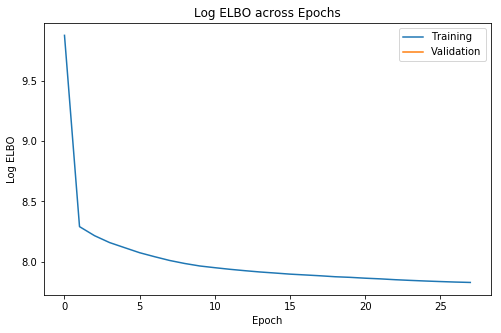

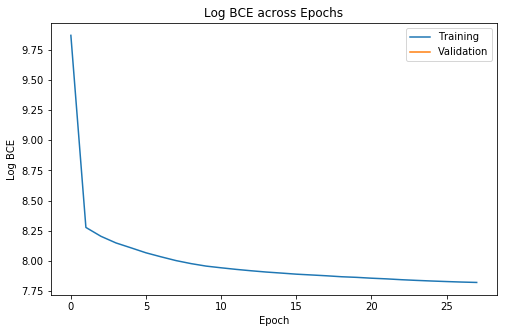

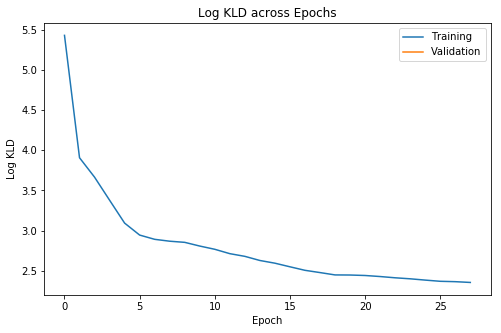

In [9]:
trainer.plot_elbo()
trainer.plot_bce()
trainer.plot_kld()

In [10]:
###Load pre-trained model
epoch = 25
model.load_state_dict(torch.load("./VAE_exp_{}_epoch_{}.pkl".format(experiment_name, epoch)))
trainer.model = model

In [11]:
###Encode data
encoding_params = {'batch_size':64, 'shuffle': False}
encoding_generator = torch.utils.data.DataLoader(patient_icd_dataset, **encoding_params)

latent, means, var = trainer.encode_data(encoding_generator)
pickle.dump(latent, open("latent_epochs_{}.p".format(epoch), 'wb'))
pickle.dump(means, open("means_epochs_{}.p".format(epoch), 'wb'))
pickle.dump(var, open("vars_epochs_{}.p".format(epoch), 'wb'))

 28%|██▊       | 204/727 [00:20<00:12, 42.42it/s]

In [12]:
###Get UMAP representations
X_umap = visualizer.umap_embedding(latent.cpu().detach().numpy(), n_components=3)
mean_umap = visualizer.umap_embedding(means.cpu().detach().numpy(), n_components=3)
var_umap = visualizer.umap_embedding(var.cpu().detach().numpy(), n_components=3)

pickle.dump(X_umap, open("X_umap_3d.p", 'wb'))
pickle.dump(mean_umap, open("mean_umap_3d.p", 'wb'))
pickle.dump(var_umap, open("var_umap_3d.p", 'wb'))

./../../src/visualizer_helper.py:21: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  return UMAP(n_components=n_components).fit_transform(X)
./../../src/visualizer_helper.py:21: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  return UMAP(n_components=n_components).fit_transform(X)


In [ ]:
# ###Additional Visualizations
# baby_keywords = ['congenital', 'infant', 'newborn', 'neonatal', 'born', 'birth']
# heart_keywords = ['heart', 'atrial', 'coronary', 'hypertension', 'vascular']


# heart_patient_idxs_tr = icd_analyzer.get_patients_idxs_with_disease_keywords(patient_df=train_df, 
#                                                                              substrings=heart_keywords, 
#                                                                              case_sensitive=False
#                                                                             )
# baby_patient_idxs_tr = icd_analyzer.get_patients_idxs_with_disease_keywords(patient_df=train_df,
#                                                                             substrings=baby_keywords,
#                                                                             case_sensitive=False
#                                                                            )

# baby_heart_colors_tr = np.array([0 for i in range(X_umap_tr.shape[0])])
# baby_heart_colors_tr[heart_patient_idxs_tr] = 100
# baby_heart_colors_tr[baby_patient_idxs_tr] = 50

# visualizer.plot2d(
#     X=X_umap_tr, 
#     filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_baby_heart_umap_train"), 
#     colors=baby_heart_colors_tr)


# heart_patient_idxs_val = icd_analyzer.get_patients_idxs_with_disease_keywords(patient_df=val_df, 
#                                                                               substrings=heart_keywords,
#                                                                               case_sensitive=False)
# baby_patient_idxs_val = icd_analyzer.get_patients_idxs_with_disease_keywords(patient_df=val_df,
#                                                                              substrings=baby_keywords,
#                                                                              case_sensitive=False)

# baby_heart_colors_val = np.array([0 for i in range(X_umap_val.shape[0])])
# baby_heart_colors_val[heart_patient_idxs_val] = 100
# baby_heart_colors_val[baby_patient_idxs_val] = 50
# visualizer.plot2d(
#     X=X_umap_val, 
#     filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_baby_heart_umap_val"), 
#     colors=baby_heart_colors_val)

In [ ]:
# X_umap_3d_tr = visualizer.umap_embedding(latent_train.cpu().detach().numpy(), n_components=3)

# visualizer.plot3d(
#     X=X_umap_3d_tr, 
#     filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_3D_train"), 
#     colors=baby_heart_colors_tr,
# )

In [ ]:
# ###Plot UMAP representations
# heart_patient_idxs = icd_analyzer.get_patients_idxs_with_disease_keywords(substrings=heart_keywords, case_sensitive=False)
# heart_colors = np.array([0 for i in range(X_umap.shape[0])])
# heart_colors[heart_patient_idxs] = 100

# visualizer.plot2d(
#     X=X_umap_tr, 
#     filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_train"), 
#     colors=heart_colors,
# )
# visualizer.plot2d(
#     X=X_umap_means_tr, 
#     filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_means_train"), 
#     colors=heart_colors,
# )
# visualizer.plot2d(
#     X=X_umap_vars_tr, 
#     filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_vars_train"), 
#     colors=heart_colors,
# )